# **NUMPY MATRICES**

### **CONTENT:**


1.   Introduction
2.   Import Librarires
3.   Data Exploration

 3.1 Detailed Information of the Dataset

 3.2 Data Cleaning
4.    Plotting Histogram For female & male weights
5.    Box-and-Whisker Plot
6.    Basic Numerical Aggregates
7.    Adding new Column
8.    Creating a new matrix 'zfemale' with all its columns Standardized
9.    Scatterplot Matrix & Correlation Coefficients
10.   Computing desired ratio
11.   Box-and-Whisker Plot
12.   Advantage/Disadvantage
13.   Standardised Body Measurements
14.   Conclusion

### **1. INTRODUCTION**


In this study, I will provide an example of Exploratory Data Analysis (EDA). I will use the National Health and Nutrition Examination Survey (NHANES) dataset and extract two CSV files: nhanes_adult_male_bmx_2020.csv and nhanes_adult_female_bmx_2020.csv. These files contain body measurements of adult males and females, respectively. We will perform various analyses, discuss the results of each, and create visualizations using the data from the dataset.

### **2. IMPORTING LIBRARIES**

In [ ]:
import numpy as np  # Importing NumPy library
import pandas as pd  # Importing Pandas library
import matplotlib.pyplot as plt  # Importing Matplotlib library's "pyplot" module
import seaborn as sns  # Imorting Seaborn library

In [ ]:
# Mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### **3. DATA EXPLORATION**
In this section, various explanations will be made about dataset.


### **3.1  Detailed Information of the Dataset**

Here we will import the dataset first. Then, we will explain the features of the dataset one by one.

In [ ]:
# Read both CSV files as Numpy Matrices
male= np.genfromtxt('/content/drive/MyDrive/male data.csv',delimiter=',',skip_header=1)
female= np.genfromtxt('/content/drive/MyDrive/female data.csv',delimiter=',',skip_header=1)

In [ ]:
# Show structure details of both matrices
print("Male array shape:", male.shape)
print("Male array data type:", male.dtype)
print("Male array size:", male.size)

print("Female array shape:", female.shape)
print("Female array data type:", female.dtype)
print("Female array size:", female.size)

Male array shape: (4082, 7)
Male array data type: float64
Male array size: 28574
Female array shape: (4222, 7)
Female array data type: float64
Female array size: 29554


***Observations:***

1.   Male dataset contain 4082 rows and 7 columns, 28574 data entries having float64 as their datatype.
2.   Feale dataset contain 4222 rows and 7 columns, 29554 data entries having float64 as their datatype.
3. It's given that each matrix consists
of seven columns namely: weight (kg), standing height (cm), upper arm length (cm), upper leg length (cm), arm circumference (cm), hip circumference (cm), waist circumference (cm).



### **3.2  Data Cleaning**

 Data cleaning is the process of preparing raw data for analysis by handling inconsistencies, correcting errors, and dealing with missing or incomplete data.

In [ ]:
print(male)
print(female)

[[  nan   nan   nan ...   nan   nan   nan]
 [ 98.8 182.3  42.  ...  38.2 108.2 120.4]
 [ 74.3 184.2  41.1 ...  30.2  94.5  86.8]
 ...
 [108.8 168.7  38.6 ...  33.6 118.  114.7]
 [ 79.5 176.4  39.5 ...  31.4  99.8  97.1]
 [ 59.7 167.5  40.3 ...  29.2  90.5  86.9]]
[[  nan   nan   nan ...   nan   nan   nan]
 [ 97.1 160.2  34.7 ...  35.8 126.1 117.9]
 [ 91.1 152.7  33.5 ...  38.5 125.5 103.1]
 ...
 [ 73.  159.6  36.2 ...  31.4 104.6  99.3]
 [ 78.6 168.5  38.1 ...  36.  102.4  98.5]
 [ 82.8 147.8  34.8 ...  39.5 121.4 110. ]]


***Observation:***  In both matrices the first row are nan

In [ ]:
# In order to know if there are any other nan value, we can check for them
male_nan=np.isnan(male).sum()
female_nan=np.isnan(female).sum()
print(male_nan)
print(female_nan)

7
7


***Observation:*** Here we came to know that there are no other nan values other than first row. Now,we can perform two actions here, either set limit from 2nd row so the 1st row will be omitted or drop that respective row with nun value.
So, i am dropping that row.

In [ ]:
# Dropping row with nan value
male1=male[~np.isnan(male).any(axis=1)]
print(male1)
female1=female[~np.isnan(female).any(axis=1)]
print(female1)

[[ 98.8 182.3  42.  ...  38.2 108.2 120.4]
 [ 74.3 184.2  41.1 ...  30.2  94.5  86.8]
 [103.7 185.3  47.  ...  32.  107.8 109.6]
 ...
 [108.8 168.7  38.6 ...  33.6 118.  114.7]
 [ 79.5 176.4  39.5 ...  31.4  99.8  97.1]
 [ 59.7 167.5  40.3 ...  29.2  90.5  86.9]]
[[ 97.1 160.2  34.7 ...  35.8 126.1 117.9]
 [ 91.1 152.7  33.5 ...  38.5 125.5 103.1]
 [ 73.  161.2  37.4 ...  31.8 106.2  92. ]
 ...
 [ 73.  159.6  36.2 ...  31.4 104.6  99.3]
 [ 78.6 168.5  38.1 ...  36.  102.4  98.5]
 [ 82.8 147.8  34.8 ...  39.5 121.4 110. ]]


***Observation:*** Rows with nun value dropped.

### **4.  Plotting Histogram For female & male weights**

In this section, we will focus on visualizing the distribution of weights for adult males and females using histograms. By examining the weight distributions separately for each gender, we can gain insights into the central tendencies, variability, and overall patterns within the data.

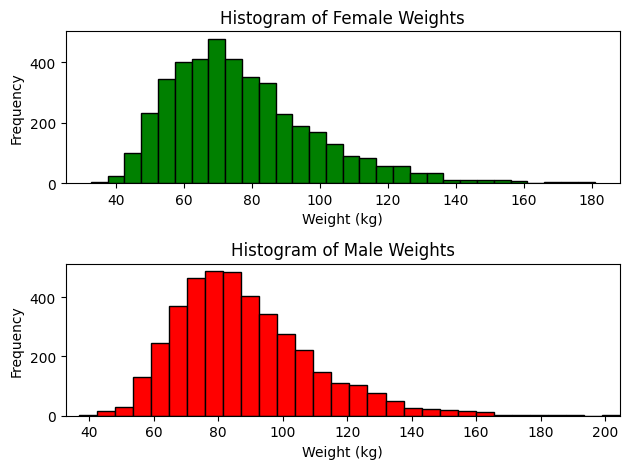

In [ ]:
# Female weights histogram
plt.subplot(2, 1, 1)
plt.hist(female1[:, 0], bins=30, color='green', edgecolor='black')
plt.title('Histogram of Female Weights')
plt.xlabel('Weight (kg)')
plt.ylabel('Frequency')

# Male weights histogram
plt.subplot(2, 1, 2)
plt.hist(male1[:, 0], bins=30, color='red', edgecolor='black')
plt.title('Histogram of Male Weights')
plt.xlabel('Weight (kg)')
plt.ylabel('Frequency')

# identical limits
plt.xlim([min(min(female1[:, 0]), min(male1[:, 0])), max(max(female1[:, 0]), max(male1[:, 0]))])
plt.tight_layout()
plt.show()

***Observations:***


*   Both distributions show a central tendency around 70-80 kg, but males have a peak closer to 80 kg while females peak around 70 kg.
*   Both distributions have a similar spread, with a range starting around 40 kg and extending to higher values. However, males seem to have a slightly wider range, extending closer to 200 kg compared to females who extend closer to 160 kg.
*   Both distributions show right skewness, but the skewness is more pronounced in the male weights.
*   Both distributions have outliers on the higher end, but the male distribution has outliers extending to a higher weight range.







### **5.   Box-and-Whisker Plot**

In this section, we will create a box-and-whisker plot for comparing the weights of adult males and females. Boxplots are a powerful tool for summarizing the distribution of a dataset, highlighting the median, quartiles, and potential outliers.

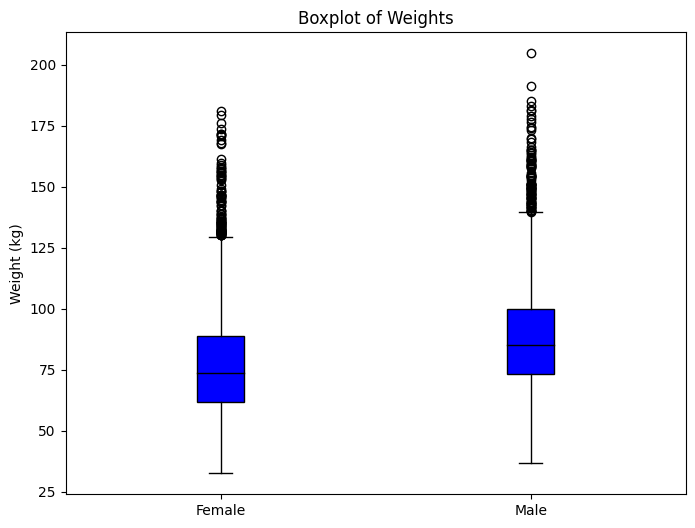

In [ ]:
plt.figure(figsize=(8, 6))
plt.boxplot([female1[:, 0], male1[:, 0]], labels=['Female', 'Male'], patch_artist=True,
            boxprops=dict(facecolor='blue'), medianprops=dict(color='black'))
plt.title('Boxplot of Weights')
plt.ylabel('Weight (kg)')
plt.show()


 ***Observations:***
*   The median weight for males (around 80 kg) is higher than the median weight for females (slightly above 70 kg).
*   The IQR(Interquartile Range) for males (70-100 kg) is wider than the IQR for females (60-85 kg), suggesting that male weights have a larger spread around the central tendency compared to female weights.
*   Both males and females have similar ranges of weights, but the lower whisker for males starts at a higher weight compared to females.
*   Both distributions have a substantial number of outliers above the upper whisker, indicating that there are individuals in both groups with significantly higher weights than the majority of the population.





### **6. Basic Numerical Aggregates**

In this section, we will compute and analyze the basic numerical aggregates of the weights of adult males and females. These aggregates include measures of location (such as mean and median), measures of dispersion (such as standard deviation and interquartile range), and measures of shape (such as skewness and kurtosis).

In [ ]:
female_weights = female1[:, 0]
male_weights = male1[:, 0]

# Female weight statistics
female_mean = np.mean(female_weights)
female_median = np.median(female_weights)
female_std = np.std(female_weights)
female_skew = pd.Series(female_weights).skew()

# Male weight statistics
male_mean = np.mean(male_weights)
male_median = np.median(male_weights)
male_std = np.std(male_weights)
male_skew = pd.Series(male_weights).skew()

# Display statistics
print("Female Weights - Mean: {:.2f}, Median: {:.2f}, Std: {:.2f}, Skew: {:.2f}".format(female_mean, female_median, female_std, female_skew))
print("Male Weights - Mean: {:.2f}, Median: {:.2f}, Std: {:.2f}, Skew: {:.2f}".format(male_mean, male_median, male_std, male_skew))

Female Weights - Mean: 77.40, Median: 73.60, Std: 21.54, Skew: 1.03
Male Weights - Mean: 88.36, Median: 85.00, Std: 21.42, Skew: 0.98


***Observations:***

*   The mean and median weights of males are higher than those of females. This suggests that on average, males weigh more than females in this dataset.
*   Both male and female weights have similar standard deviations, indicating that the spread of weights around the mean is comparable between the two groups.
*   Both distributions are right-skewed, with the female weights having a slightly higher skewness than male weights. This suggests that both distributions have more weights on the higher end, but the effect is more pronounced in females.






### **7. Adding new Column**

In this section, we will enhance the female dataset by adding a new column that contains the Body Mass Index (BMI) values for all female participants. BMI is a widely used measure to categorize individuals based on their body weight relative to their height, providing valuable insights into their overall health status.

In [ ]:
female_bmi = female1[:, 0] / (female1[:, 1] / 100) ** 2
female1 = np.column_stack((female1, female_bmi))
print(female1)
print("Female array shape:", female1.shape)
print("Female array data type:", female1.dtype)
print("Female array size:", female1.size)

[[ 97.1        160.2         34.7        ... 126.1        117.9
   37.83504078]
 [ 91.1        152.7         33.5        ... 125.5        103.1
   39.06972037]
 [ 73.         161.2         37.4        ... 106.2         92.
   28.09265496]
 ...
 [ 73.         159.6         36.2        ... 104.6         99.3
   28.65873958]
 [ 78.6        168.5         38.1        ... 102.4         98.5
   27.68361084]
 [ 82.8        147.8         34.8        ... 121.4        110.
   37.90368801]]
Female array shape: (4221, 8)
Female array data type: float64
Female array size: 33768


***Observation:*** As we can see earlier columns were 7 and now after adding column of bmi it shows total 8th column. Thus, BMI column is added successfully. Also, BMI= (weight(kg))/((height(m))^2)

### **8. Creating a new matrix 'zfemale' with all its columns Standardized**

To standardize a dataset, we need to compute the z-scores for each column.

The z-score is calculated using the formula: ***z= (x-μ)/σ***

where; x is an element in the dataset, μ is the mean of the column and σ is the standard deviation of the column.

In [ ]:
# Compute the mean and standard deviation for each column
means = np.mean(female1, axis=0)
std_dev = np.std(female1, axis=0)

# Standardize each column (compute z-scores)
zfemale = (female1 - means) / std_dev

# Display the standardized matrix
print(zfemale)
print("zfemale array shape:", zfemale.shape)
print("zfemale array size:", zfemale.size)
print("zfemale array datatype:", zfemale.dtype)

[[ 9.14295084e-01  8.95037880e-03 -5.67394633e-01 ...  1.08316157e+00
   1.11578462e+00  9.96967703e-01]
 [ 6.35775985e-01 -1.05306843e+00 -1.07893145e+00 ...  1.04475528e+00
   2.65088995e-01  1.15617483e+00]
 [-2.04423297e-01  1.50552886e-01  5.83563204e-01 ... -1.90646881e-01
  -3.72932724e-01 -2.59275010e-01]
 ...
 [-2.04423297e-01 -7.60111255e-02  7.20263874e-02 ... -2.93063641e-01
   4.66671455e-02 -1.86280603e-01]
 [ 5.55278621e-02  1.18425119e+00  8.81959680e-01 ... -4.33886685e-01
   6.83598104e-04 -3.12019657e-01]
 [ 2.50491231e-01 -1.74692071e+00 -5.24766565e-01 ...  7.82312335e-01
   6.61697091e-01  1.00581950e+00]]
zfemale array shape: (4221, 8)
zfemale array size: 33768
zfemale array datatype: float64


***Observation:***   Thus, a new matrix 'zfemale' is created with all its column standardized. As we can see, structure of 'zfemale' remains same as of 'female1' only the values are replaced by standardized values.

### **9.  Scatterplot Matrix & Correlation Coefficients**

*   A scatterplot is the simplest mode of a diagrammatic representation of two variables.It takes two perpendicular axes of coordinates, one for x and one for y.
*   The correlation coefficient is a statistical measure that describes the strength and direction of the relationship between two variables. **Pearson Correlation Coefficient:** Measures the linear relationship between two continuous variables.                                                
 **Spearman's Rank Correlation Coefficient:** Measures the strength and direction of the monotonic relationship between two ranked variables.




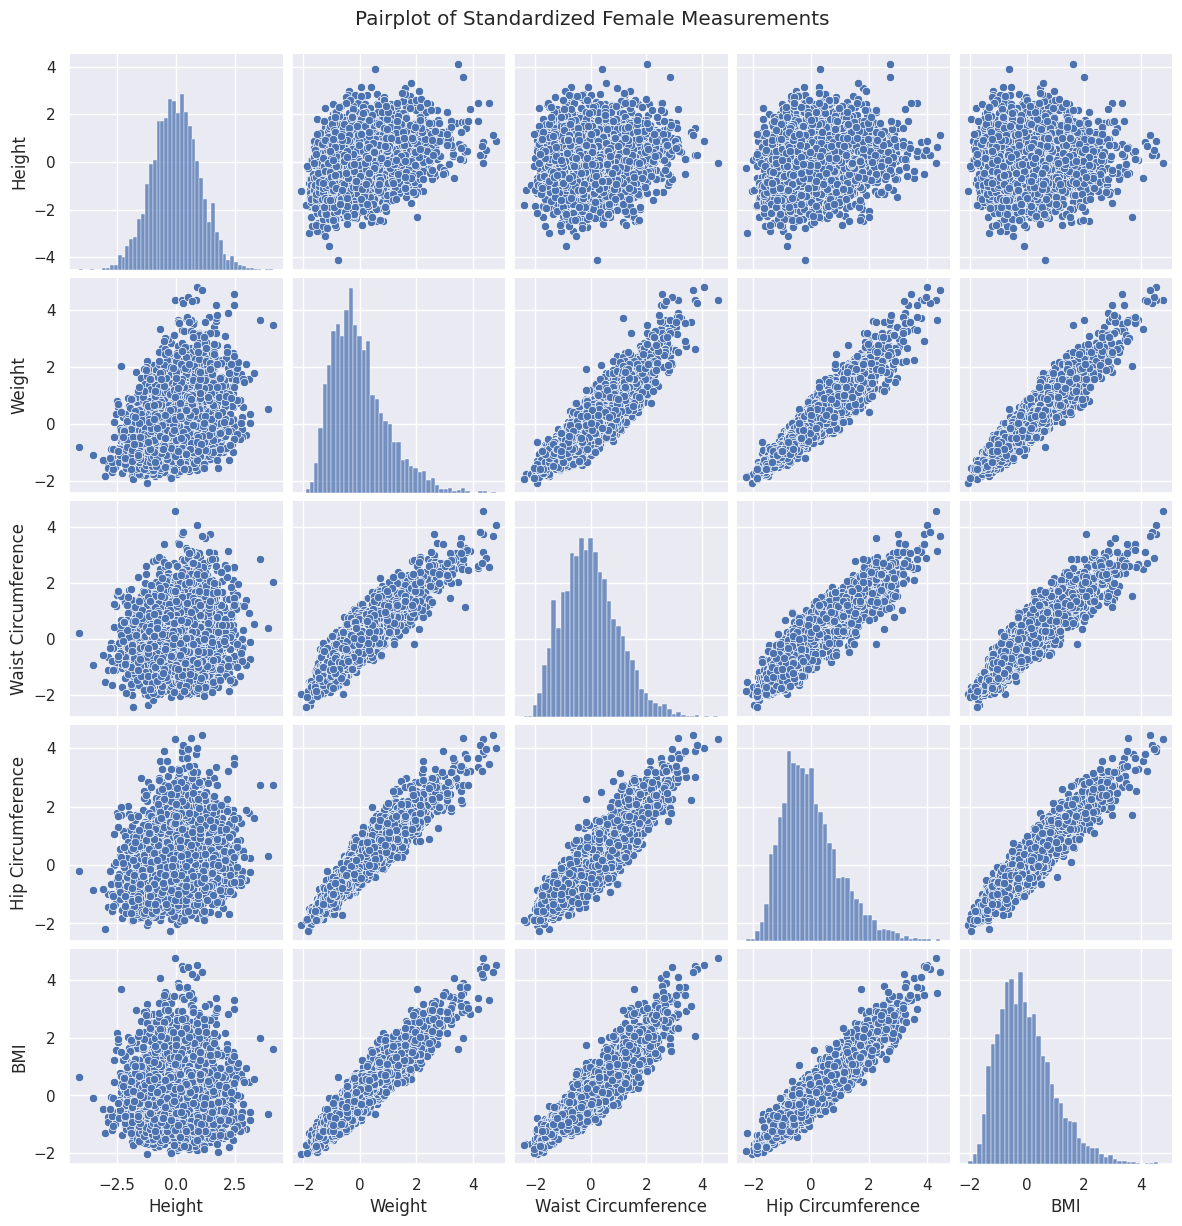

In [ ]:
# Scatterplot matrix
selected_columns = zfemale[:, [1, 0, 6, 5, 7]]
selected_df = pd.DataFrame(selected_columns, columns=['Height', 'Weight', 'Waist Circumference', 'Hip Circumference', 'BMI'])
sns.set(style="darkgrid")
palette = sns.color_palette("pastel", as_cmap=True)
pairplot = sns.pairplot(selected_df)
pairplot.fig.suptitle("Pairplot of Standardized Female Measurements", y=1.02)
pairplot.fig.set_size_inches(12, 12)
plt.show()


***Observations:***

*   The histograms along the diagonal show the distribution of each measurement, with all variables being standardized.
*   **Height vs. Weight:** There is a positive correlation between height and weight, indicating that taller individuals tend to weigh more.

  **Height vs. Waist Circumference:** The scatterplot shows a less clear but still positive correlation, suggesting that taller individuals might have larger waist circumferences.

  **Height vs. Hip Circumference:** A positive correlation is visible, with taller individuals likely having larger hip circumferences.

  **Height vs. BMI:** There is a spread in the data, with no clear linear trend between height and BMI. This might suggest that BMI is more influenced by weight relative to height.

  **Weight vs. Waist Circumference:** A strong positive correlation is observed, indicating that individuals who weigh more tend to have larger waist circumferences.

  **Weight vs. Hip Circumference:** Another strong positive correlation, suggesting that heavier individuals also have larger hip circumferences.

  **Weight vs. BMI:** A very strong positive correlation exists, as BMI is directly calculated from weight and height.

  **Waist Circumference vs. Hip Circumference:** A strong positive correlation, implying that individuals with larger waist circumferences also tend to have larger hip circumferences.

  **Waist Circumference vs. BMI:** A strong positive correlation, indicating that individuals with larger waist circumferences tend to have higher BMIs.

  **Hip Circumference vs. BMI:** A positive correlation is also visible here, with larger hip circumferences associated with higher BMIs.

*   The data points in most scatterplots form a somewhat linear pattern, particularly between weight, waist circumference, hip circumference, and BMI, reflecting the strong correlations.
*   Height has a weaker correlation with the other variables compared to the correlations among weight, waist circumference, hip circumference, and BMI.



In [ ]:
# Pearson's and Spearman's correlation coefficients
correlations = selected_df.corr()
spearman_correlations = selected_df.corr(method='spearman')
print("Pearson's correlation coefficients:\n", correlations)
print("Spearman's correlation coefficients:\n", spearman_correlations)

Pearson's correlation coefficients:
                        Height    Weight  Waist Circumference  \
Height               1.000000  0.345496             0.126547   
Weight               0.345496  1.000000             0.904550   
Waist Circumference  0.126547  0.904550             1.000000   
Hip Circumference    0.202895  0.946553             0.897407   
BMI                  0.033077  0.945900             0.921198   

                     Hip Circumference       BMI  
Height                        0.202895  0.033077  
Weight                        0.946553  0.945900  
Waist Circumference           0.897407  0.921198  
Hip Circumference             1.000000  0.944199  
BMI                           0.944199  1.000000  
Spearman's correlation coefficients:
                        Height    Weight  Waist Circumference  \
Height               1.000000  0.338860             0.108587   
Weight               0.338860  1.000000             0.900169   
Waist Circumference  0.108587  0.900169   

***Observations:***

*   Both Pearson's and Spearman's correlation coefficients show strong positive correlations between weight, waist circumference, hip circumference, and BMI.
*   The correlation between height and the other variables is generally weaker, with height showing a moderate positive correlation with weight and much weaker correlations with waist circumference, hip circumference, and BMI.
*   Pearson's and Spearman's coefficients are quite similar, indicating that the relationships are mostly linear, but Spearman's coefficients slightly differ, reflecting the rank-based (monotonic) relationships.





### **10.  Computing desired ratio**


In this section, we will find the waist circumference to height ratio and the waist circumference to hip circumference ratio of the male and female participants by adding two more columns to the males and females matrices.

In [ ]:
male_wthr = male1[:, 6] / male1[:, 1]
female_wthr = female1[:, 6] / female1[:, 1]
male_wthp = male1[:, 6] / male1[:, 5]
female_wthp = female1[:, 6] / female1[:, 5]

male1 = np.column_stack((male1, male_wthr, male_wthp))
female1 = np.column_stack((female1, female_wthr, female_wthp))

print(male1)
print("male1 array shape:", male1.shape)
print("male1 array size:", male1.size)
print("male1 array datatype:", male1.dtype)

print(female1)
print("female1 array shape:", female1.shape)
print("female1 array size:", female1.size)
print("female1 array datatype:", female1.dtype)

***Observation:*** As we can see, two new columns both in male & female matrix are added which result in increase in number of column of male from 7 to 9, while that of female from 8 to 10. The two column added respectively show the  waist circumference to height ratio and the waist circumference to hip circumference ratio of the male and female participants accordingly.

### **11. Box-and-Whisker Plot**

In this section, we draw a box-and-whisker plot with four boxes side by side, comparing the distribution of the waistto-height ratio and the waist-to-hip ratio of both male and female participants.

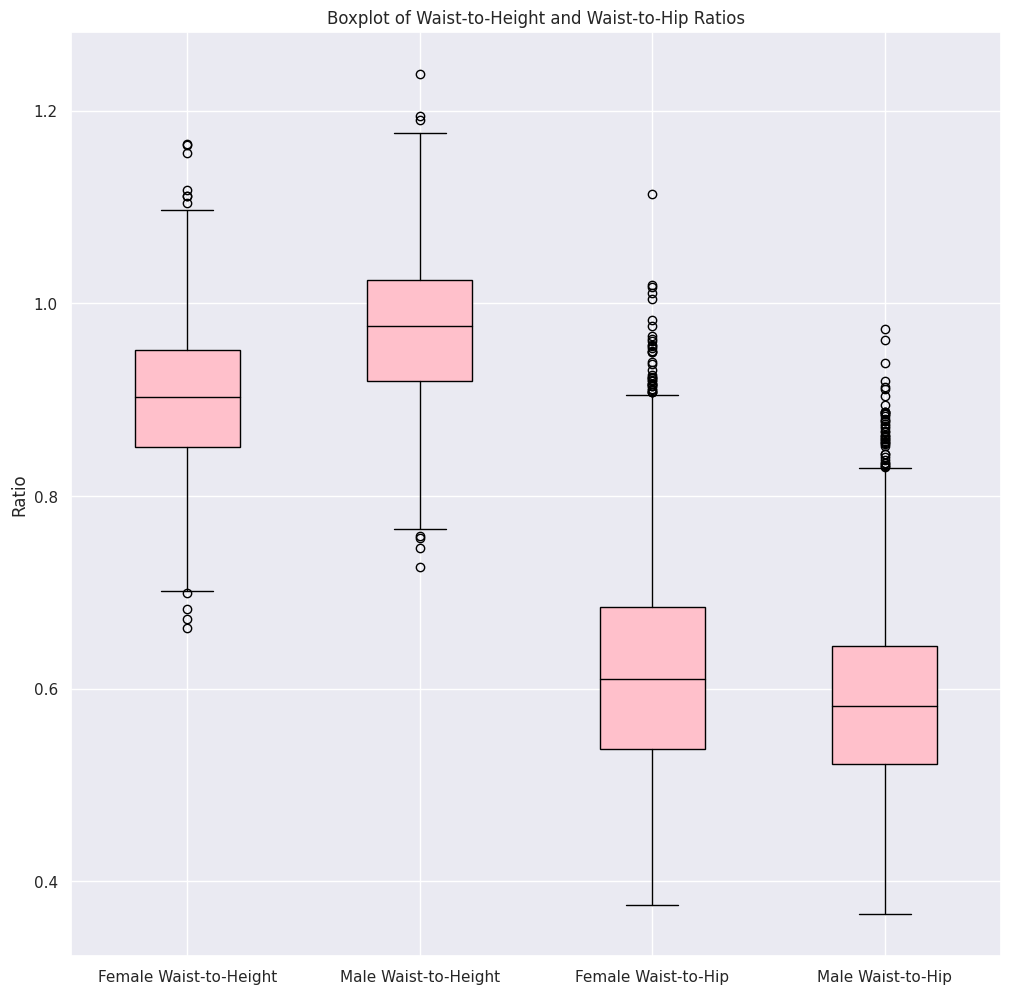

In [ ]:
plt.figure(figsize=(12, 12))
plt.boxplot([female1[:, 9], male1[:, 8], female1[:, 10], male1[:, 9]],
            labels=['Female Waist-to-Height', 'Male Waist-to-Height', 'Female Waist-to-Hip', 'Male Waist-to-Hip'],
            patch_artist=True, boxprops=dict(facecolor='pink'), medianprops=dict(color='black'))
plt.title('Boxplot of Waist-to-Height and Waist-to-Hip Ratios')
plt.ylabel('Ratio')
plt.show()

***Observations:***

*   Males tend to have higher Waist-to-Height and Waist-to-Hip ratios compared to females.
*   Both ratios for males exhibit more outliers, especially on the higher end.
*   The variability in Waist-to-Height ratio for females is greater than that for males.
*   For both males and females, the Waist-to-Hip ratio has a narrower range compared to the Waist-to-Height ratio.



### **12.  Advantage/Disadvantage**

*   **BMI**

**Advantage:** Simple to calculate, widely used, useful for large-scale studies.
                                                                    
**Disadvantage:** Does not distinguish between muscle and fat, may misclassify individuals.
*    **Waist-to-Height ratio**

**Advantage:** Better indicator of abdominal fat, correlated with health risks.

**Disadvantage:** May still miss nuances in fat distribution, less commonly used.

*   **Waist-to-Hip ratio**

**Advantage:** Indicates fat distribution pattern, associated with metabolic health risks.

**Disadvantage:** More complex to measure, less intuitive.


### **13.   Standardised Body Measurements**

In this section, we will standardise body measurements for the 5 persons with the lowest BMI and the 5 persons with the 5 highest BMI

In [ ]:
sorted_indices = np.argsort(female1[:, 7])
lowest_bmi_indices = sorted_indices[:5]
highest_bmi_indices = sorted_indices[-5:]

extreme_bmi_indices = np.concatenate((lowest_bmi_indices, highest_bmi_indices))
extreme_bmi_zfemale = zfemale[extreme_bmi_indices]

print("Standardized measurements for lowest and highest BMI cases:\n", extreme_bmi_zfemale)


Standardized measurements for lowest and highest BMI cases:
 [[-2.07978523 -1.22299143 -1.5478402  -1.16905675 -2.1947611  -2.0405496
  -1.94212128 -2.05024028]
 [-1.88017988 -0.18929313 -1.71835247  0.38637892 -2.4443617  -1.85491922
  -2.05708015 -1.99487987]
 [-1.53667299  1.80730222  0.62619127  0.5730312  -2.26607556 -1.6756899
  -1.7064556  -1.97088383]
 [-1.843044   -0.26009438 -0.22637009  0.51081377 -2.30173278 -2.25178417
  -1.85590213 -1.94177591]
 [-1.61094475  0.88688592 -0.09848588  0.47970506 -2.21258971 -1.82931504
  -1.71220354 -1.89319577]
 [ 4.2472403   0.29215539  1.86240524 -0.98240447  2.3693641   4.10445598
   3.81731803  4.39649161]
 [ 4.45612963  0.50455915  1.69189297 -1.13794804  3.34993787  3.98283607
   2.90339503  4.46201122]
 [ 4.34936397  0.27799514  2.84285081  1.94181459  4.36616887  3.9188256
   3.75409065  4.51466896]
 [ 4.8042785   0.88688592  2.11817365  1.81737973  3.77782461  4.02124236
   4.08172343  4.54270932]
 [ 4.36328993 -0.03353037 -0.0558

***Observations:***

*   The standardized measurements for the lowest BMI cases tend to be negative, indicating values below the mean.
*   The standardized measurements for the highest BMI cases tend to be positive, indicating values above the mean.

*   There is a noticeable difference between the ranges of standardized measurements for the lowest and highest BMI cases, reflecting significant differences in body measurements corresponding to BMI extremes.
*   Some extreme BMI cases show a large variance in certain standardized measurements.





### **14.  CONCLUSION**

This kernel is designed to comprehensively illustrate the stages of data visualization and analysis in machine learning. You can use the code and information provided in the example as desired. However, please ensure that you adhere to the license requirements when using the dataset. In this kernel, we aim to cover the following topics:
*   How to perform Exploratory Data Analysis (EDA) on a dataset.
*   Creating various visualizations for the dataset.
*   Finding and visualizing the correlation between features in the data.
*   Using libraries such as NumPy, Pandas, Matplotlib, and Seaborn in Python.
*   Performing simple data cleaning.
*   Visually comparing and interpreting evaluated models.
*   Calculating BMI.
*   Standardizing a given dataset.